## logistic reg
1. titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import classification_report
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [2]:
titanic= pd.read_csv("C:\\Users\\sharath\\Desktop\\all proj\\titanic.csv")

In [3]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic.shape

(418, 12)

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

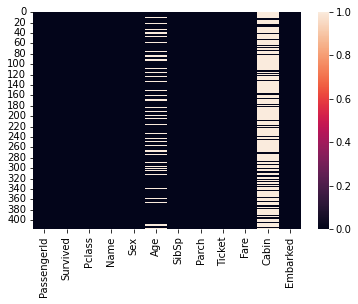

In [8]:
sns.heatmap(titanic.isnull())

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

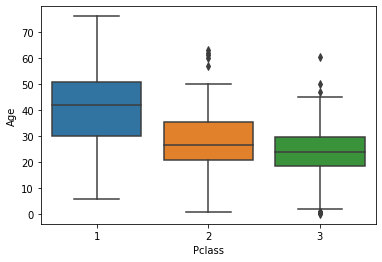

In [9]:
sns.boxplot(x="Pclass",y="Age",data=titanic)


In [10]:
# we can see that in higher class i.e class 1 are older people
# we can use the average of each class and replace the null values

In [11]:
titanic["Age"].isnull().sum()

86

<AxesSubplot:xlabel='Age'>

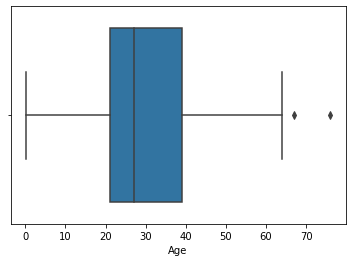

In [12]:
sns.boxplot("Age",data=titanic)

In [13]:
def replace_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if titanic["Age"].isnull():

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age

In [14]:
#titanic["Age"] = titanic[["Age","Pclass"]].apply(replace_age,axis=1)

In [15]:
titanic['Age'].fillna(30.7,inplace=True)

In [16]:
titanic['Age'] = titanic['Age'].apply(np.int64)

In [17]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [19]:
titanic["Cabin"].isnull().sum()

327

In [20]:
#since more than 50% of the data is not present in embaarked column we'll drop the column

In [21]:
titanic= titanic.drop(["Cabin"],axis=1)

In [22]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S


In [23]:
titanic=titanic.dropna()

In [24]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    int64  
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 39.1+ KB


<AxesSubplot:>

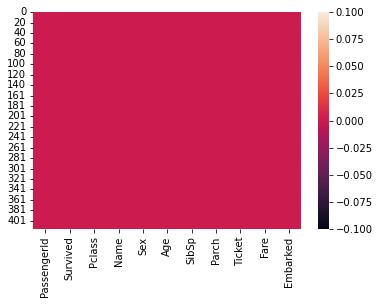

In [26]:
sns.heatmap(titanic.isnull())

In [27]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S


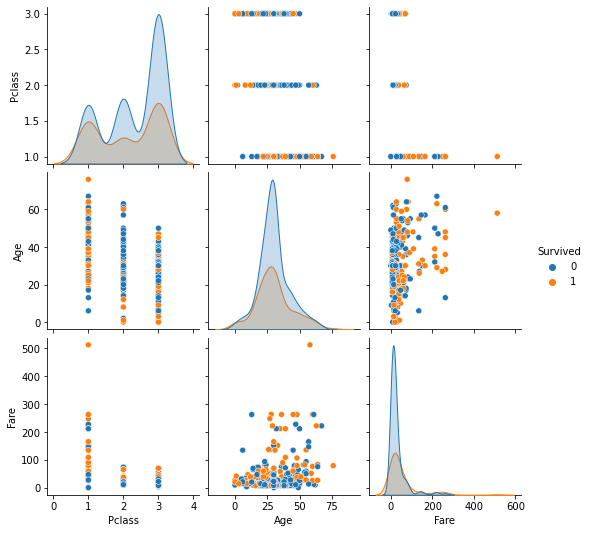

In [28]:
sns.pairplot(titanic[["Survived","Pclass","Age","Fare"]],hue="Survived")
plt.show()

<AxesSubplot:xlabel='Pclass'>

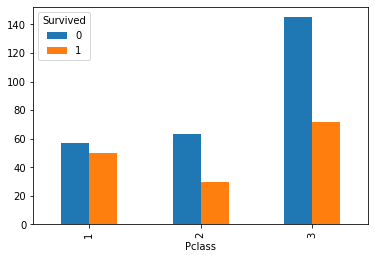

In [29]:
pd.crosstab(titanic.Pclass,titanic.Survived).plot(kind="bar")

<AxesSubplot:xlabel='Sex'>

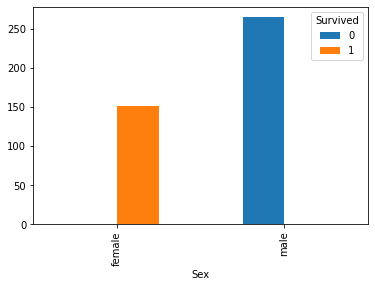

In [30]:
pd.crosstab(titanic.Sex,titanic.Survived).plot(kind="bar")

<AxesSubplot:xlabel='SibSp'>

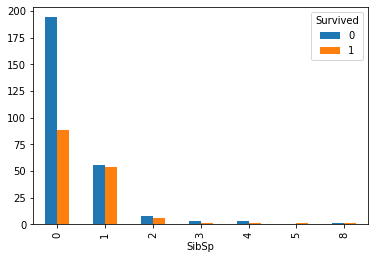

In [31]:
pd.crosstab(titanic.SibSp,titanic.Survived).plot(kind="bar")

<AxesSubplot:xlabel='Parch'>

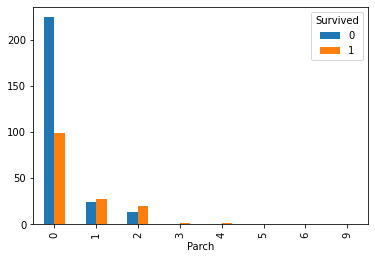

In [32]:
pd.crosstab(titanic.Parch,titanic.Survived).plot(kind="bar")

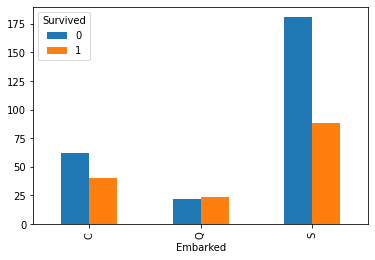

In [33]:
x=pd.crosstab(titanic.Embarked,titanic.Survived).plot(kind="bar")

In [34]:
#le_Sex = LabelEncoder()
#le_embarked = LabelEncoder()

In [35]:
#titanic['sex_n'] = le_Sex.fit_transform(titanic['Sex'])
#titanic['embarked_new'] = le_Sex.fit_transform(titanic['Embarked'])

In [36]:
#titanic=titanic.drop(["Sex"],axis=1)

In [37]:
#titanic.head()

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    int64  
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 55.3+ KB


In [39]:
x=titanic.iloc[:,[0,2,4,5,6,8,10]]
x

,PassengerId,Pclass,Sex,Age,SibSp,Ticket,Embarked
0,892,3,male,34,0,330911,Q
1,893,3,female,47,1,363272,S
2,894,2,male,62,0,240276,Q
3,895,3,male,27,0,315154,S
4,896,3,female,22,1,3101298,S
...,...,...,...,...,...,...,...
413,1305,3,male,30,0,A.5. 3236,S
414,1306,1,female,39,0,PC 17758,C
415,1307,3,male,38,0,SOTON/O.Q. 3101262,S
416,1308,3,male,30,0,359309,S


In [40]:
#sex = pd.get_dummies(titanic['Sex'],drop_first=True)
#embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [41]:
#titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
#titanic=pd.concat([titanic,sex,embark],axis=1)

In [43]:
#titanic=titanic.drop(["PassengerId","Pclass","SibSp","Parch","Fare","Q","S","male"],axis=1)

In [44]:
le_Pclass = LabelEncoder()
le_Sex = LabelEncoder()

In [45]:
titanic['Pclass_n'] = le_Pclass.fit_transform(titanic['Pclass'])
titanic['Sex_n'] = le_Sex.fit_transform(titanic['Sex'])

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Pclass_n,Sex_n
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,2,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,2,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2,0


In [47]:
titanic=titanic.drop(['PassengerId',"Pclass","Name","Sex","SibSp","Parch","Ticket","Embarked"],axis=1)

In [48]:
#target=titanic["Survived"]

In [49]:
#titanic=titanic.drop(["Survived"],axis=1)

In [50]:
titanic.head()

,Survived,Age,Fare,Pclass_n,Sex_n
0,0,34,7.8292,2,1
1,1,47,7.0000,2,0
2,0,62,9.6875,1,1
3,0,27,8.6625,2,1
4,1,22,12.2875,2,0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.70, 
                                                    )

In [52]:
X=titanic.loc[:, titanic.columns != 'Survived']
y=titanic.loc[:, titanic.columns == 'Survived']
model=LogisticRegression(solver="liblinear",random_state=70)
model.fit(X,y)
model.intercept_

array([1.45623189])

In [53]:
model.coef_

array([[ 0.02055261,  0.00794951,  0.44659741, -6.62324966]])

In [54]:
y_pred=model.predict(X)
cm=metrics.confusion_matrix(y,y_pred)
print(cm)

[[265   0]
 [  0 152]]


In [55]:
model.score(X,y)

1.0

# DECISION TREE

In [56]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [57]:
model.fit(X,y)

DecisionTreeClassifier()

In [58]:
model.score(X,y)

1.0

## random forest

In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'sqrt')

In [63]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.60, random_state = 45)

In [65]:
rfFit = rf.fit(X_train, y_train)

In [66]:
y_predRF = rfFit.predict(X_test)

In [67]:
len(y_predRF)

251

In [68]:
y_predRF

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [69]:
pd.crosstab(y_test, y_predRF, margins = True, rownames = ["Actual"], colnames = ["Predict"])

Predict,0,1,All
Actual,,,
0,162,0,162
1,0,89,89
All,162,89,251


In [70]:
rf.score(X_test,y_test)

1.0

In [71]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        89

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251

